## <span style="color:#db7d60">Setup</span>

In [1]:
%load_ext autoreload
%autoreload 2

import json
import math
import pickle
import numpy as np
import pandas as pd
import textwrap
import sys
from pathlib import Path
from IPython.display import display, Markdown
import matplotlib.pyplot as plt

# pUtil needs to be loaded from the root directory
parent_dir = Path().resolve().parent
sys.path.insert(0, str(parent_dir))

import pUtil
from analysis_common import *
import data_manager
import analysis as anal

import vector
from particle import Particle
from particle import PDGID

pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', None)
pd.set_option('display.expand_frame_repr', False)

/global/homes/e/eshy/.local/lib/python3.11/site-packages/coffea/nanoevents/schemas/fcc.py:5: FutureWarning: In version 2025.1.0 (target date: 2024-12-31 11:59:59-06:00), this will be an error.
To raise these warnings as errors (and get stack traces to find out where they're called), run
    import warnings
    warnings.filterwarnings("error", module="coffea.*")
after the first `import coffea` or use `@pytest.mark.filterwarnings("error:::coffea.*")` in pytest.
Issue: coffea.nanoevents.methods.vector will be removed and replaced with scikit-hep vector. Nanoevents schemas internal to coffea will be migrated. Otherwise please consider using that package!.
  from coffea.nanoevents.methods import vector


## <span style="color:#db7d60">Analysis</span>

### Intro

The px, py, pz distributions for 5_9_1 show negative linear momenta values for both input and generated data. This should be impossible, especially for input data.
The goal is to determine why this is the case.

Here is an example:

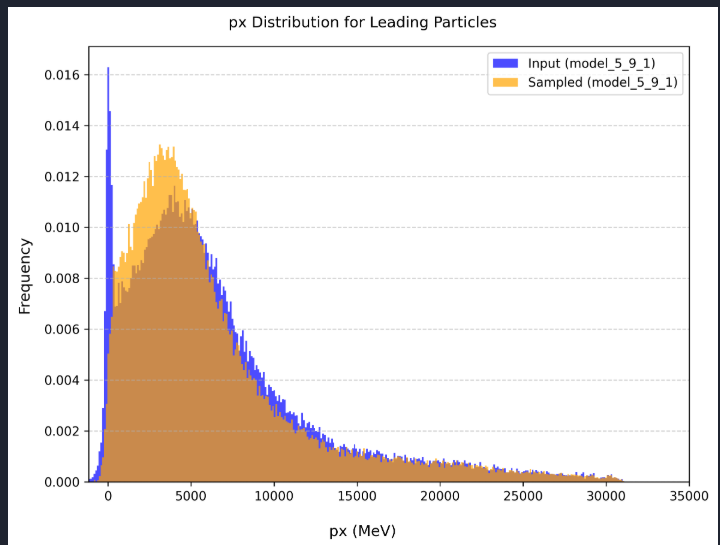


### 1

We need to determine if there are negative momenta in the input (i.e. data from MCGenerators).

In [2]:
model_name = 'model_5_9_1'
dataset_path = pUtil.get_data_dir() / f'{pUtil.get_model_dataset_name(model_name)}.csv'

raw_input_data = data_manager.load_geant4_dataset(dataset_path, pad_token=np.nan)

nout_file = open('momenta_neg.txt', 'w')
zout_file = open('momenta_zero.txt', 'w')

for event in raw_input_data:
    for particle in event:
        pdgid, e, px, py, pz = particle
        if px == 0.0 or py == 0.0 or pz == 0.0:
            zout_file.write(f"Zero momentum found: {pdgid}, {e}, {px}, {py}, {pz}\n")
        if px < 0.0 or py < 0.0 or pz < 0.0:
            nout_file.write(f"Negative momentum found: {pdgid}, {e}, {px}, {py}, {pz}\n")
            
            

KeyboardInterrupt: 

The results show negative momenta exist, but zero momenta do not. This is good.

### 2

We need to determine if there are negative momenta in the leading input and sampled particles.

In [3]:
model_name = 'model_5_9_1'
input_leading_path = pUtil.get_model_preparation_dir(model_name) / 'real_leading_test_particles.csv'
sampled_leading_path = pUtil.get_latest_sampling_dir(model_name) / 'sampled_leading_particles.csv'

columns = ["num_particles", "pdgid", "e", "px", "py", "pz", "pt", "eta", "theta", "phi"]
real_df = pd.read_csv(input_leading_path, sep=" ", names=columns, engine="c", header=None)
sampled_df = pd.read_csv(sampled_leading_path, sep=" ", names=columns, engine="c", header=None)

real_zero_df = real_df[(real_df["px"] == 0) | (real_df["py"] == 0) | (real_df["pz"] == 0)]
sampled_zero_df = sampled_df[(sampled_df["px"] == 0) | (sampled_df["py"] == 0) | (sampled_df["pz"] == 0)]
print(real_zero_df.shape)
print(sampled_zero_df.shape)

real_neg_df = real_df[(real_df["px"] < 0) | (real_df["py"] < 0) | (real_df["pz"] < 0)]
sampled_neg_df = sampled_df[(sampled_df["px"] < 0) | (sampled_df["py"] < 0) | (sampled_df["pz"] < 0)]
print(real_neg_df.shape)
print(sampled_neg_df.shape)

real_neg_pt_df = real_df[(real_df["pt"] <= 0)]
sampled_neg_pt_df = sampled_df[(sampled_df["pt"] <= 0)]
print(real_neg_pt_df.shape)
print(sampled_neg_pt_df.shape)

(0, 10)
(0, 10)
(7504, 10)
(10141, 10)
(0, 10)
(0, 10)


Once again, there are no zero momenta. Furthermore, there is no negative pt. This is also good.